Gaussian Low pass filtering

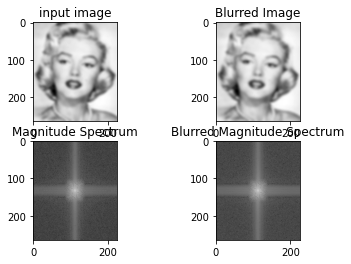

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('gray.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

img2= cv2.GaussianBlur(img,(5,5),0)
f2 = np.fft.fft2(img2)
fshift2 = np.fft.fftshift(f2)
magnitude_spectrum2 = 20*np.log(np.abs(fshift2))

res_img=[img,img2,magnitude_spectrum,magnitude_spectrum2]

res_title=['input image','Blurred Image','Magnitude Spectrum','Blurred Magnitude Spectrum']

for i in range(4):
    #param 1: row, 2: column,3: index gambar keberapa
    plt.subplot(2,2,i+1)
    plt.imshow(res_img[i],'gray')
    plt.title(res_title[i])
plt.show()


plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


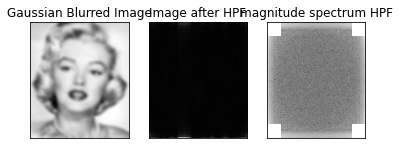

In [11]:
rows, cols = img2.shape
crow,ccol = rows/2 , cols/2
fshift[int(crow-30):int(crow+30), int(ccol-30):int(ccol+30)] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)
magnitude_spectrum1 = 20*np.log(np.abs(f_ishift))

plt.subplot(131),plt.imshow(img2, cmap = 'gray')
plt.title('Gaussian Blurred Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('magnitude spectrum HPF'), plt.xticks([]), plt.yticks([])


plt.show()

In [12]:
import math

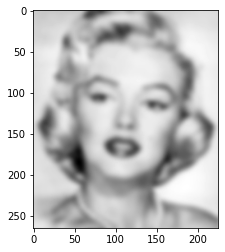

In [13]:
def distance(a,b):
    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

def butterworthHP(d, shape, n):
    base = np.zeros(shape[:2])
    rows, cols = shape[:2]
    center = (rows/2, cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1/(1+(distance((y,x),center)/d**2*n))
    return base

res = np.fft.fft2(img)
shifted_res = np.fft.fftshift(res)

butterworth_center = shifted_res * butterworthHP(10,img.shape, 1)
butterworth_res = np.fft.ifftshift(butterworth_center)
inv_butterworth = np.fft.ifft2(butterworth_res)
plt.imshow(1+np.abs(inv_butterworth), cmap='gray')
plt.show()

I couldnt find the code online so i ask my friend to teach me

Source : https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html